# Homework 3
---

## *Part 1*

This cell reads in the VOC2012 data set, parses through the object classifications, and saves them out to a pickled dictionary object.

In [11]:
import xml.etree.ElementTree as ET
import os
import cv2 as cv
import pickle

def getElement(xml_element: ET.Element):
    """Get the element name and bounding box from the xml."""
    name = xml_element.find('name').text
    xmin = int(xml_element.find('bndbox/xmin').text.split('.')[0])
    xmax = int(xml_element.find('bndbox/xmax').text.split('.')[0])
    ymin = int(xml_element.find('bndbox/ymin').text.split('.')[0])
    ymax = int(xml_element.find('bndbox/ymax').text.split('.')[0])
    return (name, (xmin,xmax,ymin,ymax))

def parseXml(filename: str):
    tree = ET.parse(annotations + "\\" + filename)
    root = tree.getroot()
    img_filename = image_dir + "\\" + root.find('filename').text
    elements = []
    for object in root.findall('object'):
        item = getElement(object)
        elements.append(item)
        for part in object.iter('part'):
            item = getElement(part)
            elements.append(item)  

    return (img_filename, elements)

def extract(imgSrc, elements):
    dataset = {}
    for label in elements:
        if label[0] not in dataset.keys(): dataset[label[0]] = []
        img = imgSrc[label[1][2]:label[1][3],label[1][0]:label[1][1]]
        img = cv.resize(img, (224, 224))
        dataset[label[0]].append(img)
    return dataset

# The directory where the dataset is stored.
directory = 'C:\\Users\\robjm\\datasets\\VOC2012'
annotations = directory + "\\Annotations"
image_dir = directory + "\\JPEGImages"

# Create a list of all of the xml files to be read.
annotation_files = [entry for entry in os.listdir(annotations) if entry.endswith('.xml')]
total_files = len(annotation_files)
dataset = {}

def process(filename):
    imgName, labels = parseXml(filename)
    imgSrc = cv.imread(imgName)
    return extract(imgSrc, labels)

processedfiles = 0
for filename in annotation_files:    
    work = process(filename)    
    for key in work:
        if key not in dataset.keys(): dataset[key] = []
        dataset[key].extend(work[key])
    processedfiles += 1
    print('Completed {} out of {}.'.format(processedfiles, total_files))

print('Finished processing image ' + str(processedfiles) + '/' + str(total_files) + '.')
with open('voc2012.pickle', 'wb') as out:
    pickle.dump(dataset, out)

Completed 1 out of 17125.
Completed 2 out of 17125.
Completed 3 out of 17125.
Completed 4 out of 17125.
Completed 5 out of 17125.
Completed 6 out of 17125.
Completed 7 out of 17125.
Completed 8 out of 17125.
Completed 9 out of 17125.
Completed 10 out of 17125.
Completed 11 out of 17125.
Completed 12 out of 17125.
Completed 13 out of 17125.
Completed 14 out of 17125.
Completed 15 out of 17125.
Completed 16 out of 17125.
Completed 17 out of 17125.
Completed 18 out of 17125.
Completed 19 out of 17125.
Completed 20 out of 17125.
Completed 21 out of 17125.
Completed 22 out of 17125.
Completed 23 out of 17125.
Completed 24 out of 17125.
Completed 25 out of 17125.
Completed 26 out of 17125.
Completed 27 out of 17125.
Completed 28 out of 17125.
Completed 29 out of 17125.
Completed 30 out of 17125.
Completed 31 out of 17125.
Completed 32 out of 17125.
Completed 33 out of 17125.
Completed 34 out of 17125.
Completed 35 out of 17125.
Completed 36 out of 17125.
Completed 37 out of 17125.
Completed 

Completed 337 out of 17125.
Completed 338 out of 17125.
Completed 339 out of 17125.
Completed 340 out of 17125.
Completed 341 out of 17125.
Completed 342 out of 17125.
Completed 343 out of 17125.
Completed 344 out of 17125.
Completed 345 out of 17125.
Completed 346 out of 17125.
Completed 347 out of 17125.
Completed 348 out of 17125.
Completed 349 out of 17125.
Completed 350 out of 17125.
Completed 351 out of 17125.
Completed 352 out of 17125.
Completed 353 out of 17125.
Completed 354 out of 17125.
Completed 355 out of 17125.
Completed 356 out of 17125.
Completed 357 out of 17125.
Completed 358 out of 17125.
Completed 359 out of 17125.
Completed 360 out of 17125.
Completed 361 out of 17125.
Completed 362 out of 17125.
Completed 363 out of 17125.
Completed 364 out of 17125.
Completed 365 out of 17125.
Completed 366 out of 17125.
Completed 367 out of 17125.
Completed 368 out of 17125.
Completed 369 out of 17125.
Completed 370 out of 17125.
Completed 371 out of 17125.
Completed 372 out of

Completed 686 out of 17125.
Completed 687 out of 17125.
Completed 688 out of 17125.
Completed 689 out of 17125.
Completed 690 out of 17125.
Completed 691 out of 17125.
Completed 692 out of 17125.
Completed 693 out of 17125.
Completed 694 out of 17125.
Completed 695 out of 17125.
Completed 696 out of 17125.
Completed 697 out of 17125.
Completed 698 out of 17125.
Completed 699 out of 17125.
Completed 700 out of 17125.
Completed 701 out of 17125.
Completed 702 out of 17125.
Completed 703 out of 17125.
Completed 704 out of 17125.
Completed 705 out of 17125.
Completed 706 out of 17125.
Completed 707 out of 17125.
Completed 708 out of 17125.
Completed 709 out of 17125.
Completed 710 out of 17125.
Completed 711 out of 17125.
Completed 712 out of 17125.
Completed 713 out of 17125.
Completed 714 out of 17125.
Completed 715 out of 17125.
Completed 716 out of 17125.
Completed 717 out of 17125.
Completed 718 out of 17125.
Completed 719 out of 17125.
Completed 720 out of 17125.
Completed 721 out of

Completed 1019 out of 17125.
Completed 1020 out of 17125.
Completed 1021 out of 17125.
Completed 1022 out of 17125.
Completed 1023 out of 17125.
Completed 1024 out of 17125.
Completed 1025 out of 17125.
Completed 1026 out of 17125.
Completed 1027 out of 17125.
Completed 1028 out of 17125.
Completed 1029 out of 17125.
Completed 1030 out of 17125.
Completed 1031 out of 17125.
Completed 1032 out of 17125.
Completed 1033 out of 17125.
Completed 1034 out of 17125.
Completed 1035 out of 17125.
Completed 1036 out of 17125.
Completed 1037 out of 17125.
Completed 1038 out of 17125.
Completed 1039 out of 17125.
Completed 1040 out of 17125.
Completed 1041 out of 17125.
Completed 1042 out of 17125.
Completed 1043 out of 17125.
Completed 1044 out of 17125.
Completed 1045 out of 17125.
Completed 1046 out of 17125.
Completed 1047 out of 17125.
Completed 1048 out of 17125.
Completed 1049 out of 17125.
Completed 1050 out of 17125.
Completed 1051 out of 17125.
Completed 1052 out of 17125.
Completed 1053

Completed 1342 out of 17125.
Completed 1343 out of 17125.
Completed 1344 out of 17125.
Completed 1345 out of 17125.
Completed 1346 out of 17125.
Completed 1347 out of 17125.
Completed 1348 out of 17125.
Completed 1349 out of 17125.
Completed 1350 out of 17125.
Completed 1351 out of 17125.
Completed 1352 out of 17125.
Completed 1353 out of 17125.
Completed 1354 out of 17125.
Completed 1355 out of 17125.
Completed 1356 out of 17125.
Completed 1357 out of 17125.
Completed 1358 out of 17125.
Completed 1359 out of 17125.
Completed 1360 out of 17125.
Completed 1361 out of 17125.
Completed 1362 out of 17125.
Completed 1363 out of 17125.
Completed 1364 out of 17125.
Completed 1365 out of 17125.
Completed 1366 out of 17125.
Completed 1367 out of 17125.
Completed 1368 out of 17125.
Completed 1369 out of 17125.
Completed 1370 out of 17125.
Completed 1371 out of 17125.
Completed 1372 out of 17125.
Completed 1373 out of 17125.
Completed 1374 out of 17125.
Completed 1375 out of 17125.
Completed 1376

Completed 1642 out of 17125.
Completed 1643 out of 17125.
Completed 1644 out of 17125.
Completed 1645 out of 17125.
Completed 1646 out of 17125.
Completed 1647 out of 17125.
Completed 1648 out of 17125.
Completed 1649 out of 17125.
Completed 1650 out of 17125.
Completed 1651 out of 17125.
Completed 1652 out of 17125.
Completed 1653 out of 17125.
Completed 1654 out of 17125.
Completed 1655 out of 17125.
Completed 1656 out of 17125.
Completed 1657 out of 17125.
Completed 1658 out of 17125.
Completed 1659 out of 17125.
Completed 1660 out of 17125.
Completed 1661 out of 17125.
Completed 1662 out of 17125.
Completed 1663 out of 17125.
Completed 1664 out of 17125.
Completed 1665 out of 17125.
Completed 1666 out of 17125.
Completed 1667 out of 17125.
Completed 1668 out of 17125.
Completed 1669 out of 17125.
Completed 1670 out of 17125.
Completed 1671 out of 17125.
Completed 1672 out of 17125.
Completed 1673 out of 17125.
Completed 1674 out of 17125.
Completed 1675 out of 17125.
Completed 1676

Completed 1933 out of 17125.
Completed 1934 out of 17125.
Completed 1935 out of 17125.
Completed 1936 out of 17125.
Completed 1937 out of 17125.
Completed 1938 out of 17125.
Completed 1939 out of 17125.
Completed 1940 out of 17125.
Completed 1941 out of 17125.
Completed 1942 out of 17125.
Completed 1943 out of 17125.
Completed 1944 out of 17125.
Completed 1945 out of 17125.
Completed 1946 out of 17125.
Completed 1947 out of 17125.
Completed 1948 out of 17125.
Completed 1949 out of 17125.
Completed 1950 out of 17125.
Completed 1951 out of 17125.
Completed 1952 out of 17125.
Completed 1953 out of 17125.
Completed 1954 out of 17125.
Completed 1955 out of 17125.
Completed 1956 out of 17125.
Completed 1957 out of 17125.
Completed 1958 out of 17125.
Completed 1959 out of 17125.
Completed 1960 out of 17125.
Completed 1961 out of 17125.
Completed 1962 out of 17125.
Completed 1963 out of 17125.
Completed 1964 out of 17125.
Completed 1965 out of 17125.
Completed 1966 out of 17125.
Completed 1967

Completed 2218 out of 17125.
Completed 2219 out of 17125.
Completed 2220 out of 17125.
Completed 2221 out of 17125.
Completed 2222 out of 17125.
Completed 2223 out of 17125.
Completed 2224 out of 17125.
Completed 2225 out of 17125.
Completed 2226 out of 17125.
Completed 2227 out of 17125.
Completed 2228 out of 17125.
Completed 2229 out of 17125.
Completed 2230 out of 17125.
Completed 2231 out of 17125.
Completed 2232 out of 17125.
Completed 2233 out of 17125.
Completed 2234 out of 17125.
Completed 2235 out of 17125.
Completed 2236 out of 17125.
Completed 2237 out of 17125.
Completed 2238 out of 17125.
Completed 2239 out of 17125.
Completed 2240 out of 17125.
Completed 2241 out of 17125.
Completed 2242 out of 17125.
Completed 2243 out of 17125.
Completed 2244 out of 17125.
Completed 2245 out of 17125.
Completed 2246 out of 17125.
Completed 2247 out of 17125.
Completed 2248 out of 17125.
Completed 2249 out of 17125.
Completed 2250 out of 17125.
Completed 2251 out of 17125.
Completed 2252

Completed 2503 out of 17125.
Completed 2504 out of 17125.
Completed 2505 out of 17125.
Completed 2506 out of 17125.
Completed 2507 out of 17125.
Completed 2508 out of 17125.
Completed 2509 out of 17125.
Completed 2510 out of 17125.
Completed 2511 out of 17125.
Completed 2512 out of 17125.
Completed 2513 out of 17125.
Completed 2514 out of 17125.
Completed 2515 out of 17125.
Completed 2516 out of 17125.
Completed 2517 out of 17125.
Completed 2518 out of 17125.
Completed 2519 out of 17125.
Completed 2520 out of 17125.
Completed 2521 out of 17125.
Completed 2522 out of 17125.
Completed 2523 out of 17125.
Completed 2524 out of 17125.
Completed 2525 out of 17125.
Completed 2526 out of 17125.
Completed 2527 out of 17125.
Completed 2528 out of 17125.
Completed 2529 out of 17125.
Completed 2530 out of 17125.
Completed 2531 out of 17125.
Completed 2532 out of 17125.
Completed 2533 out of 17125.
Completed 2534 out of 17125.
Completed 2535 out of 17125.
Completed 2536 out of 17125.
Completed 2537

Completed 2789 out of 17125.
Completed 2790 out of 17125.
Completed 2791 out of 17125.
Completed 2792 out of 17125.
Completed 2793 out of 17125.
Completed 2794 out of 17125.
Completed 2795 out of 17125.
Completed 2796 out of 17125.
Completed 2797 out of 17125.
Completed 2798 out of 17125.
Completed 2799 out of 17125.
Completed 2800 out of 17125.
Completed 2801 out of 17125.
Completed 2802 out of 17125.
Completed 2803 out of 17125.
Completed 2804 out of 17125.
Completed 2805 out of 17125.
Completed 2806 out of 17125.
Completed 2807 out of 17125.
Completed 2808 out of 17125.
Completed 2809 out of 17125.
Completed 2810 out of 17125.
Completed 2811 out of 17125.
Completed 2812 out of 17125.
Completed 2813 out of 17125.
Completed 2814 out of 17125.
Completed 2815 out of 17125.
Completed 2816 out of 17125.
Completed 2817 out of 17125.
Completed 2818 out of 17125.
Completed 2819 out of 17125.
Completed 2820 out of 17125.
Completed 2821 out of 17125.
Completed 2822 out of 17125.
Completed 2823

Completed 3074 out of 17125.
Completed 3075 out of 17125.
Completed 3076 out of 17125.
Completed 3077 out of 17125.
Completed 3078 out of 17125.
Completed 3079 out of 17125.
Completed 3080 out of 17125.
Completed 3081 out of 17125.
Completed 3082 out of 17125.
Completed 3083 out of 17125.
Completed 3084 out of 17125.
Completed 3085 out of 17125.
Completed 3086 out of 17125.
Completed 3087 out of 17125.
Completed 3088 out of 17125.
Completed 3089 out of 17125.
Completed 3090 out of 17125.
Completed 3091 out of 17125.
Completed 3092 out of 17125.
Completed 3093 out of 17125.
Completed 3094 out of 17125.
Completed 3095 out of 17125.
Completed 3096 out of 17125.
Completed 3097 out of 17125.
Completed 3098 out of 17125.
Completed 3099 out of 17125.
Completed 3100 out of 17125.
Completed 3101 out of 17125.
Completed 3102 out of 17125.
Completed 3103 out of 17125.
Completed 3104 out of 17125.
Completed 3105 out of 17125.
Completed 3106 out of 17125.
Completed 3107 out of 17125.
Completed 3108

Completed 3401 out of 17125.
Completed 3402 out of 17125.
Completed 3403 out of 17125.
Completed 3404 out of 17125.
Completed 3405 out of 17125.
Completed 3406 out of 17125.
Completed 3407 out of 17125.
Completed 3408 out of 17125.
Completed 3409 out of 17125.
Completed 3410 out of 17125.
Completed 3411 out of 17125.
Completed 3412 out of 17125.
Completed 3413 out of 17125.
Completed 3414 out of 17125.
Completed 3415 out of 17125.
Completed 3416 out of 17125.
Completed 3417 out of 17125.
Completed 3418 out of 17125.
Completed 3419 out of 17125.
Completed 3420 out of 17125.
Completed 3421 out of 17125.
Completed 3422 out of 17125.
Completed 3423 out of 17125.
Completed 3424 out of 17125.
Completed 3425 out of 17125.
Completed 3426 out of 17125.
Completed 3427 out of 17125.
Completed 3428 out of 17125.
Completed 3429 out of 17125.
Completed 3430 out of 17125.
Completed 3431 out of 17125.
Completed 3432 out of 17125.
Completed 3433 out of 17125.
Completed 3434 out of 17125.
Completed 3435

Completed 3686 out of 17125.
Completed 3687 out of 17125.
Completed 3688 out of 17125.
Completed 3689 out of 17125.
Completed 3690 out of 17125.
Completed 3691 out of 17125.
Completed 3692 out of 17125.
Completed 3693 out of 17125.
Completed 3694 out of 17125.
Completed 3695 out of 17125.
Completed 3696 out of 17125.
Completed 3697 out of 17125.
Completed 3698 out of 17125.
Completed 3699 out of 17125.
Completed 3700 out of 17125.
Completed 3701 out of 17125.
Completed 3702 out of 17125.
Completed 3703 out of 17125.
Completed 3704 out of 17125.
Completed 3705 out of 17125.
Completed 3706 out of 17125.
Completed 3707 out of 17125.
Completed 3708 out of 17125.
Completed 3709 out of 17125.
Completed 3710 out of 17125.
Completed 3711 out of 17125.
Completed 3712 out of 17125.
Completed 3713 out of 17125.
Completed 3714 out of 17125.
Completed 3715 out of 17125.
Completed 3716 out of 17125.
Completed 3717 out of 17125.
Completed 3718 out of 17125.
Completed 3719 out of 17125.
Completed 3720

Completed 4007 out of 17125.
Completed 4008 out of 17125.
Completed 4009 out of 17125.
Completed 4010 out of 17125.
Completed 4011 out of 17125.
Completed 4012 out of 17125.
Completed 4013 out of 17125.
Completed 4014 out of 17125.
Completed 4015 out of 17125.
Completed 4016 out of 17125.
Completed 4017 out of 17125.
Completed 4018 out of 17125.
Completed 4019 out of 17125.
Completed 4020 out of 17125.
Completed 4021 out of 17125.
Completed 4022 out of 17125.
Completed 4023 out of 17125.
Completed 4024 out of 17125.
Completed 4025 out of 17125.
Completed 4026 out of 17125.
Completed 4027 out of 17125.
Completed 4028 out of 17125.
Completed 4029 out of 17125.
Completed 4030 out of 17125.
Completed 4031 out of 17125.
Completed 4032 out of 17125.
Completed 4033 out of 17125.
Completed 4034 out of 17125.
Completed 4035 out of 17125.
Completed 4036 out of 17125.
Completed 4037 out of 17125.
Completed 4038 out of 17125.
Completed 4039 out of 17125.
Completed 4040 out of 17125.
Completed 4041

Completed 4303 out of 17125.
Completed 4304 out of 17125.
Completed 4305 out of 17125.
Completed 4306 out of 17125.
Completed 4307 out of 17125.
Completed 4308 out of 17125.
Completed 4309 out of 17125.
Completed 4310 out of 17125.
Completed 4311 out of 17125.
Completed 4312 out of 17125.
Completed 4313 out of 17125.
Completed 4314 out of 17125.
Completed 4315 out of 17125.
Completed 4316 out of 17125.
Completed 4317 out of 17125.
Completed 4318 out of 17125.
Completed 4319 out of 17125.
Completed 4320 out of 17125.
Completed 4321 out of 17125.
Completed 4322 out of 17125.
Completed 4323 out of 17125.
Completed 4324 out of 17125.
Completed 4325 out of 17125.
Completed 4326 out of 17125.
Completed 4327 out of 17125.
Completed 4328 out of 17125.
Completed 4329 out of 17125.
Completed 4330 out of 17125.
Completed 4331 out of 17125.
Completed 4332 out of 17125.
Completed 4333 out of 17125.
Completed 4334 out of 17125.
Completed 4335 out of 17125.
Completed 4336 out of 17125.
Completed 4337

Completed 4602 out of 17125.
Completed 4603 out of 17125.
Completed 4604 out of 17125.
Completed 4605 out of 17125.
Completed 4606 out of 17125.
Completed 4607 out of 17125.
Completed 4608 out of 17125.
Completed 4609 out of 17125.
Completed 4610 out of 17125.
Completed 4611 out of 17125.
Completed 4612 out of 17125.
Completed 4613 out of 17125.
Completed 4614 out of 17125.
Completed 4615 out of 17125.
Completed 4616 out of 17125.
Completed 4617 out of 17125.
Completed 4618 out of 17125.
Completed 4619 out of 17125.
Completed 4620 out of 17125.
Completed 4621 out of 17125.
Completed 4622 out of 17125.
Completed 4623 out of 17125.
Completed 4624 out of 17125.
Completed 4625 out of 17125.
Completed 4626 out of 17125.
Completed 4627 out of 17125.
Completed 4628 out of 17125.
Completed 4629 out of 17125.
Completed 4630 out of 17125.
Completed 4631 out of 17125.
Completed 4632 out of 17125.
Completed 4633 out of 17125.
Completed 4634 out of 17125.
Completed 4635 out of 17125.
Completed 4636

Completed 4895 out of 17125.
Completed 4896 out of 17125.
Completed 4897 out of 17125.
Completed 4898 out of 17125.
Completed 4899 out of 17125.
Completed 4900 out of 17125.
Completed 4901 out of 17125.
Completed 4902 out of 17125.
Completed 4903 out of 17125.
Completed 4904 out of 17125.
Completed 4905 out of 17125.
Completed 4906 out of 17125.
Completed 4907 out of 17125.
Completed 4908 out of 17125.
Completed 4909 out of 17125.
Completed 4910 out of 17125.
Completed 4911 out of 17125.
Completed 4912 out of 17125.
Completed 4913 out of 17125.
Completed 4914 out of 17125.
Completed 4915 out of 17125.
Completed 4916 out of 17125.
Completed 4917 out of 17125.
Completed 4918 out of 17125.
Completed 4919 out of 17125.
Completed 4920 out of 17125.
Completed 4921 out of 17125.
Completed 4922 out of 17125.
Completed 4923 out of 17125.
Completed 4924 out of 17125.
Completed 4925 out of 17125.
Completed 4926 out of 17125.
Completed 4927 out of 17125.
Completed 4928 out of 17125.
Completed 4929

Completed 5189 out of 17125.
Completed 5190 out of 17125.
Completed 5191 out of 17125.
Completed 5192 out of 17125.
Completed 5193 out of 17125.
Completed 5194 out of 17125.
Completed 5195 out of 17125.
Completed 5196 out of 17125.
Completed 5197 out of 17125.
Completed 5198 out of 17125.
Completed 5199 out of 17125.
Completed 5200 out of 17125.
Completed 5201 out of 17125.
Completed 5202 out of 17125.
Completed 5203 out of 17125.
Completed 5204 out of 17125.
Completed 5205 out of 17125.
Completed 5206 out of 17125.
Completed 5207 out of 17125.
Completed 5208 out of 17125.
Completed 5209 out of 17125.
Completed 5210 out of 17125.
Completed 5211 out of 17125.
Completed 5212 out of 17125.
Completed 5213 out of 17125.
Completed 5214 out of 17125.
Completed 5215 out of 17125.
Completed 5216 out of 17125.
Completed 5217 out of 17125.
Completed 5218 out of 17125.
Completed 5219 out of 17125.
Completed 5220 out of 17125.
Completed 5221 out of 17125.
Completed 5222 out of 17125.
Completed 5223

Completed 5485 out of 17125.
Completed 5486 out of 17125.
Completed 5487 out of 17125.
Completed 5488 out of 17125.
Completed 5489 out of 17125.
Completed 5490 out of 17125.
Completed 5491 out of 17125.
Completed 5492 out of 17125.
Completed 5493 out of 17125.
Completed 5494 out of 17125.
Completed 5495 out of 17125.
Completed 5496 out of 17125.
Completed 5497 out of 17125.
Completed 5498 out of 17125.
Completed 5499 out of 17125.
Completed 5500 out of 17125.
Completed 5501 out of 17125.
Completed 5502 out of 17125.
Completed 5503 out of 17125.
Completed 5504 out of 17125.
Completed 5505 out of 17125.
Completed 5506 out of 17125.
Completed 5507 out of 17125.
Completed 5508 out of 17125.
Completed 5509 out of 17125.
Completed 5510 out of 17125.
Completed 5511 out of 17125.
Completed 5512 out of 17125.
Completed 5513 out of 17125.
Completed 5514 out of 17125.
Completed 5515 out of 17125.
Completed 5516 out of 17125.
Completed 5517 out of 17125.
Completed 5518 out of 17125.
Completed 5519

Completed 5777 out of 17125.
Completed 5778 out of 17125.
Completed 5779 out of 17125.
Completed 5780 out of 17125.
Completed 5781 out of 17125.
Completed 5782 out of 17125.
Completed 5783 out of 17125.
Completed 5784 out of 17125.
Completed 5785 out of 17125.
Completed 5786 out of 17125.
Completed 5787 out of 17125.
Completed 5788 out of 17125.
Completed 5789 out of 17125.
Completed 5790 out of 17125.
Completed 5791 out of 17125.
Completed 5792 out of 17125.
Completed 5793 out of 17125.
Completed 5794 out of 17125.
Completed 5795 out of 17125.
Completed 5796 out of 17125.
Completed 5797 out of 17125.
Completed 5798 out of 17125.
Completed 5799 out of 17125.
Completed 5800 out of 17125.
Completed 5801 out of 17125.
Completed 5802 out of 17125.
Completed 5803 out of 17125.
Completed 5804 out of 17125.
Completed 5805 out of 17125.
Completed 5806 out of 17125.
Completed 5807 out of 17125.
Completed 5808 out of 17125.
Completed 5809 out of 17125.
Completed 5810 out of 17125.
Completed 5811

Completed 6066 out of 17125.
Completed 6067 out of 17125.
Completed 6068 out of 17125.
Completed 6069 out of 17125.
Completed 6070 out of 17125.
Completed 6071 out of 17125.
Completed 6072 out of 17125.
Completed 6073 out of 17125.
Completed 6074 out of 17125.
Completed 6075 out of 17125.
Completed 6076 out of 17125.
Completed 6077 out of 17125.
Completed 6078 out of 17125.
Completed 6079 out of 17125.
Completed 6080 out of 17125.
Completed 6081 out of 17125.
Completed 6082 out of 17125.
Completed 6083 out of 17125.
Completed 6084 out of 17125.
Completed 6085 out of 17125.
Completed 6086 out of 17125.
Completed 6087 out of 17125.
Completed 6088 out of 17125.
Completed 6089 out of 17125.
Completed 6090 out of 17125.
Completed 6091 out of 17125.
Completed 6092 out of 17125.
Completed 6093 out of 17125.
Completed 6094 out of 17125.
Completed 6095 out of 17125.
Completed 6096 out of 17125.
Completed 6097 out of 17125.
Completed 6098 out of 17125.
Completed 6099 out of 17125.
Completed 6100

Completed 6353 out of 17125.
Completed 6354 out of 17125.
Completed 6355 out of 17125.
Completed 6356 out of 17125.
Completed 6357 out of 17125.
Completed 6358 out of 17125.
Completed 6359 out of 17125.
Completed 6360 out of 17125.
Completed 6361 out of 17125.
Completed 6362 out of 17125.
Completed 6363 out of 17125.
Completed 6364 out of 17125.
Completed 6365 out of 17125.
Completed 6366 out of 17125.
Completed 6367 out of 17125.
Completed 6368 out of 17125.
Completed 6369 out of 17125.
Completed 6370 out of 17125.
Completed 6371 out of 17125.
Completed 6372 out of 17125.
Completed 6373 out of 17125.
Completed 6374 out of 17125.
Completed 6375 out of 17125.
Completed 6376 out of 17125.
Completed 6377 out of 17125.
Completed 6378 out of 17125.
Completed 6379 out of 17125.
Completed 6380 out of 17125.
Completed 6381 out of 17125.
Completed 6382 out of 17125.
Completed 6383 out of 17125.
Completed 6384 out of 17125.
Completed 6385 out of 17125.
Completed 6386 out of 17125.
Completed 6387

Completed 6638 out of 17125.
Completed 6639 out of 17125.
Completed 6640 out of 17125.
Completed 6641 out of 17125.
Completed 6642 out of 17125.
Completed 6643 out of 17125.
Completed 6644 out of 17125.
Completed 6645 out of 17125.
Completed 6646 out of 17125.
Completed 6647 out of 17125.
Completed 6648 out of 17125.
Completed 6649 out of 17125.
Completed 6650 out of 17125.
Completed 6651 out of 17125.
Completed 6652 out of 17125.
Completed 6653 out of 17125.
Completed 6654 out of 17125.
Completed 6655 out of 17125.
Completed 6656 out of 17125.
Completed 6657 out of 17125.
Completed 6658 out of 17125.
Completed 6659 out of 17125.
Completed 6660 out of 17125.
Completed 6661 out of 17125.
Completed 6662 out of 17125.
Completed 6663 out of 17125.
Completed 6664 out of 17125.
Completed 6665 out of 17125.
Completed 6666 out of 17125.
Completed 6667 out of 17125.
Completed 6668 out of 17125.
Completed 6669 out of 17125.
Completed 6670 out of 17125.
Completed 6671 out of 17125.
Completed 6672

Completed 6921 out of 17125.
Completed 6922 out of 17125.
Completed 6923 out of 17125.
Completed 6924 out of 17125.
Completed 6925 out of 17125.
Completed 6926 out of 17125.
Completed 6927 out of 17125.
Completed 6928 out of 17125.
Completed 6929 out of 17125.
Completed 6930 out of 17125.
Completed 6931 out of 17125.
Completed 6932 out of 17125.
Completed 6933 out of 17125.
Completed 6934 out of 17125.
Completed 6935 out of 17125.
Completed 6936 out of 17125.
Completed 6937 out of 17125.
Completed 6938 out of 17125.
Completed 6939 out of 17125.
Completed 6940 out of 17125.
Completed 6941 out of 17125.
Completed 6942 out of 17125.
Completed 6943 out of 17125.
Completed 6944 out of 17125.
Completed 6945 out of 17125.
Completed 6946 out of 17125.
Completed 6947 out of 17125.
Completed 6948 out of 17125.
Completed 6949 out of 17125.
Completed 6950 out of 17125.
Completed 6951 out of 17125.
Completed 6952 out of 17125.
Completed 6953 out of 17125.
Completed 6954 out of 17125.
Completed 6955

Completed 7239 out of 17125.
Completed 7240 out of 17125.
Completed 7241 out of 17125.
Completed 7242 out of 17125.
Completed 7243 out of 17125.
Completed 7244 out of 17125.
Completed 7245 out of 17125.
Completed 7246 out of 17125.
Completed 7247 out of 17125.
Completed 7248 out of 17125.
Completed 7249 out of 17125.
Completed 7250 out of 17125.
Completed 7251 out of 17125.
Completed 7252 out of 17125.
Completed 7253 out of 17125.
Completed 7254 out of 17125.
Completed 7255 out of 17125.
Completed 7256 out of 17125.
Completed 7257 out of 17125.
Completed 7258 out of 17125.
Completed 7259 out of 17125.
Completed 7260 out of 17125.
Completed 7261 out of 17125.
Completed 7262 out of 17125.
Completed 7263 out of 17125.
Completed 7264 out of 17125.
Completed 7265 out of 17125.
Completed 7266 out of 17125.
Completed 7267 out of 17125.
Completed 7268 out of 17125.
Completed 7269 out of 17125.
Completed 7270 out of 17125.
Completed 7271 out of 17125.
Completed 7272 out of 17125.
Completed 7273

Completed 7552 out of 17125.
Completed 7553 out of 17125.
Completed 7554 out of 17125.
Completed 7555 out of 17125.
Completed 7556 out of 17125.
Completed 7557 out of 17125.
Completed 7558 out of 17125.
Completed 7559 out of 17125.
Completed 7560 out of 17125.
Completed 7561 out of 17125.
Completed 7562 out of 17125.
Completed 7563 out of 17125.
Completed 7564 out of 17125.
Completed 7565 out of 17125.
Completed 7566 out of 17125.
Completed 7567 out of 17125.
Completed 7568 out of 17125.
Completed 7569 out of 17125.
Completed 7570 out of 17125.
Completed 7571 out of 17125.
Completed 7572 out of 17125.
Completed 7573 out of 17125.
Completed 7574 out of 17125.
Completed 7575 out of 17125.
Completed 7576 out of 17125.
Completed 7577 out of 17125.
Completed 7578 out of 17125.
Completed 7579 out of 17125.
Completed 7580 out of 17125.
Completed 7581 out of 17125.
Completed 7582 out of 17125.
Completed 7583 out of 17125.
Completed 7584 out of 17125.
Completed 7585 out of 17125.
Completed 7586

Completed 7861 out of 17125.
Completed 7862 out of 17125.
Completed 7863 out of 17125.
Completed 7864 out of 17125.
Completed 7865 out of 17125.
Completed 7866 out of 17125.
Completed 7867 out of 17125.
Completed 7868 out of 17125.
Completed 7869 out of 17125.
Completed 7870 out of 17125.
Completed 7871 out of 17125.
Completed 7872 out of 17125.
Completed 7873 out of 17125.
Completed 7874 out of 17125.
Completed 7875 out of 17125.
Completed 7876 out of 17125.
Completed 7877 out of 17125.
Completed 7878 out of 17125.
Completed 7879 out of 17125.
Completed 7880 out of 17125.
Completed 7881 out of 17125.
Completed 7882 out of 17125.
Completed 7883 out of 17125.
Completed 7884 out of 17125.
Completed 7885 out of 17125.
Completed 7886 out of 17125.
Completed 7887 out of 17125.
Completed 7888 out of 17125.
Completed 7889 out of 17125.
Completed 7890 out of 17125.
Completed 7891 out of 17125.
Completed 7892 out of 17125.
Completed 7893 out of 17125.
Completed 7894 out of 17125.
Completed 7895

Completed 8146 out of 17125.
Completed 8147 out of 17125.
Completed 8148 out of 17125.
Completed 8149 out of 17125.
Completed 8150 out of 17125.
Completed 8151 out of 17125.
Completed 8152 out of 17125.
Completed 8153 out of 17125.
Completed 8154 out of 17125.
Completed 8155 out of 17125.
Completed 8156 out of 17125.
Completed 8157 out of 17125.
Completed 8158 out of 17125.
Completed 8159 out of 17125.
Completed 8160 out of 17125.
Completed 8161 out of 17125.
Completed 8162 out of 17125.
Completed 8163 out of 17125.
Completed 8164 out of 17125.
Completed 8165 out of 17125.
Completed 8166 out of 17125.
Completed 8167 out of 17125.
Completed 8168 out of 17125.
Completed 8169 out of 17125.
Completed 8170 out of 17125.
Completed 8171 out of 17125.
Completed 8172 out of 17125.
Completed 8173 out of 17125.
Completed 8174 out of 17125.
Completed 8175 out of 17125.
Completed 8176 out of 17125.
Completed 8177 out of 17125.
Completed 8178 out of 17125.
Completed 8179 out of 17125.
Completed 8180

Completed 8467 out of 17125.
Completed 8468 out of 17125.
Completed 8469 out of 17125.
Completed 8470 out of 17125.
Completed 8471 out of 17125.
Completed 8472 out of 17125.
Completed 8473 out of 17125.
Completed 8474 out of 17125.
Completed 8475 out of 17125.
Completed 8476 out of 17125.
Completed 8477 out of 17125.
Completed 8478 out of 17125.
Completed 8479 out of 17125.
Completed 8480 out of 17125.
Completed 8481 out of 17125.
Completed 8482 out of 17125.
Completed 8483 out of 17125.
Completed 8484 out of 17125.
Completed 8485 out of 17125.
Completed 8486 out of 17125.
Completed 8487 out of 17125.
Completed 8488 out of 17125.
Completed 8489 out of 17125.
Completed 8490 out of 17125.
Completed 8491 out of 17125.
Completed 8492 out of 17125.
Completed 8493 out of 17125.
Completed 8494 out of 17125.
Completed 8495 out of 17125.
Completed 8496 out of 17125.
Completed 8497 out of 17125.
Completed 8498 out of 17125.
Completed 8499 out of 17125.
Completed 8500 out of 17125.
Completed 8501

Completed 8781 out of 17125.
Completed 8782 out of 17125.
Completed 8783 out of 17125.
Completed 8784 out of 17125.
Completed 8785 out of 17125.
Completed 8786 out of 17125.
Completed 8787 out of 17125.
Completed 8788 out of 17125.
Completed 8789 out of 17125.
Completed 8790 out of 17125.
Completed 8791 out of 17125.
Completed 8792 out of 17125.
Completed 8793 out of 17125.
Completed 8794 out of 17125.
Completed 8795 out of 17125.
Completed 8796 out of 17125.
Completed 8797 out of 17125.
Completed 8798 out of 17125.
Completed 8799 out of 17125.
Completed 8800 out of 17125.
Completed 8801 out of 17125.
Completed 8802 out of 17125.
Completed 8803 out of 17125.
Completed 8804 out of 17125.
Completed 8805 out of 17125.
Completed 8806 out of 17125.
Completed 8807 out of 17125.
Completed 8808 out of 17125.
Completed 8809 out of 17125.
Completed 8810 out of 17125.
Completed 8811 out of 17125.
Completed 8812 out of 17125.
Completed 8813 out of 17125.
Completed 8814 out of 17125.
Completed 8815

Completed 9090 out of 17125.
Completed 9091 out of 17125.
Completed 9092 out of 17125.
Completed 9093 out of 17125.
Completed 9094 out of 17125.
Completed 9095 out of 17125.
Completed 9096 out of 17125.
Completed 9097 out of 17125.
Completed 9098 out of 17125.
Completed 9099 out of 17125.
Completed 9100 out of 17125.
Completed 9101 out of 17125.
Completed 9102 out of 17125.
Completed 9103 out of 17125.
Completed 9104 out of 17125.
Completed 9105 out of 17125.
Completed 9106 out of 17125.
Completed 9107 out of 17125.
Completed 9108 out of 17125.
Completed 9109 out of 17125.
Completed 9110 out of 17125.
Completed 9111 out of 17125.
Completed 9112 out of 17125.
Completed 9113 out of 17125.
Completed 9114 out of 17125.
Completed 9115 out of 17125.
Completed 9116 out of 17125.
Completed 9117 out of 17125.
Completed 9118 out of 17125.
Completed 9119 out of 17125.
Completed 9120 out of 17125.
Completed 9121 out of 17125.
Completed 9122 out of 17125.
Completed 9123 out of 17125.
Completed 9124

Completed 9401 out of 17125.
Completed 9402 out of 17125.
Completed 9403 out of 17125.
Completed 9404 out of 17125.
Completed 9405 out of 17125.
Completed 9406 out of 17125.
Completed 9407 out of 17125.
Completed 9408 out of 17125.
Completed 9409 out of 17125.
Completed 9410 out of 17125.
Completed 9411 out of 17125.
Completed 9412 out of 17125.
Completed 9413 out of 17125.
Completed 9414 out of 17125.
Completed 9415 out of 17125.
Completed 9416 out of 17125.
Completed 9417 out of 17125.
Completed 9418 out of 17125.
Completed 9419 out of 17125.
Completed 9420 out of 17125.
Completed 9421 out of 17125.
Completed 9422 out of 17125.
Completed 9423 out of 17125.
Completed 9424 out of 17125.
Completed 9425 out of 17125.
Completed 9426 out of 17125.
Completed 9427 out of 17125.
Completed 9428 out of 17125.
Completed 9429 out of 17125.
Completed 9430 out of 17125.
Completed 9431 out of 17125.
Completed 9432 out of 17125.
Completed 9433 out of 17125.
Completed 9434 out of 17125.
Completed 9435

Completed 9705 out of 17125.
Completed 9706 out of 17125.
Completed 9707 out of 17125.
Completed 9708 out of 17125.
Completed 9709 out of 17125.
Completed 9710 out of 17125.
Completed 9711 out of 17125.
Completed 9712 out of 17125.
Completed 9713 out of 17125.
Completed 9714 out of 17125.
Completed 9715 out of 17125.
Completed 9716 out of 17125.
Completed 9717 out of 17125.
Completed 9718 out of 17125.
Completed 9719 out of 17125.
Completed 9720 out of 17125.
Completed 9721 out of 17125.
Completed 9722 out of 17125.
Completed 9723 out of 17125.
Completed 9724 out of 17125.
Completed 9725 out of 17125.
Completed 9726 out of 17125.
Completed 9727 out of 17125.
Completed 9728 out of 17125.
Completed 9729 out of 17125.
Completed 9730 out of 17125.
Completed 9731 out of 17125.
Completed 9732 out of 17125.
Completed 9733 out of 17125.
Completed 9734 out of 17125.
Completed 9735 out of 17125.
Completed 9736 out of 17125.
Completed 9737 out of 17125.
Completed 9738 out of 17125.
Completed 9739

Completed 10015 out of 17125.
Completed 10016 out of 17125.
Completed 10017 out of 17125.
Completed 10018 out of 17125.
Completed 10019 out of 17125.
Completed 10020 out of 17125.
Completed 10021 out of 17125.
Completed 10022 out of 17125.
Completed 10023 out of 17125.
Completed 10024 out of 17125.
Completed 10025 out of 17125.
Completed 10026 out of 17125.
Completed 10027 out of 17125.
Completed 10028 out of 17125.
Completed 10029 out of 17125.
Completed 10030 out of 17125.
Completed 10031 out of 17125.
Completed 10032 out of 17125.
Completed 10033 out of 17125.
Completed 10034 out of 17125.
Completed 10035 out of 17125.
Completed 10036 out of 17125.
Completed 10037 out of 17125.
Completed 10038 out of 17125.
Completed 10039 out of 17125.
Completed 10040 out of 17125.
Completed 10041 out of 17125.
Completed 10042 out of 17125.
Completed 10043 out of 17125.
Completed 10044 out of 17125.
Completed 10045 out of 17125.
Completed 10046 out of 17125.
Completed 10047 out of 17125.
Completed 

Completed 10315 out of 17125.
Completed 10316 out of 17125.
Completed 10317 out of 17125.
Completed 10318 out of 17125.
Completed 10319 out of 17125.
Completed 10320 out of 17125.
Completed 10321 out of 17125.
Completed 10322 out of 17125.
Completed 10323 out of 17125.
Completed 10324 out of 17125.
Completed 10325 out of 17125.
Completed 10326 out of 17125.
Completed 10327 out of 17125.
Completed 10328 out of 17125.
Completed 10329 out of 17125.
Completed 10330 out of 17125.
Completed 10331 out of 17125.
Completed 10332 out of 17125.
Completed 10333 out of 17125.
Completed 10334 out of 17125.
Completed 10335 out of 17125.
Completed 10336 out of 17125.
Completed 10337 out of 17125.
Completed 10338 out of 17125.
Completed 10339 out of 17125.
Completed 10340 out of 17125.
Completed 10341 out of 17125.
Completed 10342 out of 17125.
Completed 10343 out of 17125.
Completed 10344 out of 17125.
Completed 10345 out of 17125.
Completed 10346 out of 17125.
Completed 10347 out of 17125.
Completed 

Completed 10612 out of 17125.
Completed 10613 out of 17125.
Completed 10614 out of 17125.
Completed 10615 out of 17125.
Completed 10616 out of 17125.
Completed 10617 out of 17125.
Completed 10618 out of 17125.
Completed 10619 out of 17125.
Completed 10620 out of 17125.
Completed 10621 out of 17125.
Completed 10622 out of 17125.
Completed 10623 out of 17125.
Completed 10624 out of 17125.
Completed 10625 out of 17125.
Completed 10626 out of 17125.
Completed 10627 out of 17125.
Completed 10628 out of 17125.
Completed 10629 out of 17125.
Completed 10630 out of 17125.
Completed 10631 out of 17125.
Completed 10632 out of 17125.
Completed 10633 out of 17125.
Completed 10634 out of 17125.
Completed 10635 out of 17125.
Completed 10636 out of 17125.
Completed 10637 out of 17125.
Completed 10638 out of 17125.
Completed 10639 out of 17125.
Completed 10640 out of 17125.
Completed 10641 out of 17125.
Completed 10642 out of 17125.
Completed 10643 out of 17125.
Completed 10644 out of 17125.
Completed 

Completed 10916 out of 17125.
Completed 10917 out of 17125.
Completed 10918 out of 17125.
Completed 10919 out of 17125.
Completed 10920 out of 17125.
Completed 10921 out of 17125.
Completed 10922 out of 17125.
Completed 10923 out of 17125.
Completed 10924 out of 17125.
Completed 10925 out of 17125.
Completed 10926 out of 17125.
Completed 10927 out of 17125.
Completed 10928 out of 17125.
Completed 10929 out of 17125.
Completed 10930 out of 17125.
Completed 10931 out of 17125.
Completed 10932 out of 17125.
Completed 10933 out of 17125.
Completed 10934 out of 17125.
Completed 10935 out of 17125.
Completed 10936 out of 17125.
Completed 10937 out of 17125.
Completed 10938 out of 17125.
Completed 10939 out of 17125.
Completed 10940 out of 17125.
Completed 10941 out of 17125.
Completed 10942 out of 17125.
Completed 10943 out of 17125.
Completed 10944 out of 17125.
Completed 10945 out of 17125.
Completed 10946 out of 17125.
Completed 10947 out of 17125.
Completed 10948 out of 17125.
Completed 

Completed 11222 out of 17125.
Completed 11223 out of 17125.
Completed 11224 out of 17125.
Completed 11225 out of 17125.
Completed 11226 out of 17125.
Completed 11227 out of 17125.
Completed 11228 out of 17125.
Completed 11229 out of 17125.
Completed 11230 out of 17125.
Completed 11231 out of 17125.
Completed 11232 out of 17125.
Completed 11233 out of 17125.
Completed 11234 out of 17125.
Completed 11235 out of 17125.
Completed 11236 out of 17125.
Completed 11237 out of 17125.
Completed 11238 out of 17125.
Completed 11239 out of 17125.
Completed 11240 out of 17125.
Completed 11241 out of 17125.
Completed 11242 out of 17125.
Completed 11243 out of 17125.
Completed 11244 out of 17125.
Completed 11245 out of 17125.
Completed 11246 out of 17125.
Completed 11247 out of 17125.
Completed 11248 out of 17125.
Completed 11249 out of 17125.
Completed 11250 out of 17125.
Completed 11251 out of 17125.
Completed 11252 out of 17125.
Completed 11253 out of 17125.
Completed 11254 out of 17125.
Completed 

Completed 11516 out of 17125.
Completed 11517 out of 17125.
Completed 11518 out of 17125.
Completed 11519 out of 17125.
Completed 11520 out of 17125.
Completed 11521 out of 17125.
Completed 11522 out of 17125.
Completed 11523 out of 17125.
Completed 11524 out of 17125.
Completed 11525 out of 17125.
Completed 11526 out of 17125.
Completed 11527 out of 17125.
Completed 11528 out of 17125.
Completed 11529 out of 17125.
Completed 11530 out of 17125.
Completed 11531 out of 17125.
Completed 11532 out of 17125.
Completed 11533 out of 17125.
Completed 11534 out of 17125.
Completed 11535 out of 17125.
Completed 11536 out of 17125.
Completed 11537 out of 17125.
Completed 11538 out of 17125.
Completed 11539 out of 17125.
Completed 11540 out of 17125.
Completed 11541 out of 17125.
Completed 11542 out of 17125.
Completed 11543 out of 17125.
Completed 11544 out of 17125.
Completed 11545 out of 17125.
Completed 11546 out of 17125.
Completed 11547 out of 17125.
Completed 11548 out of 17125.
Completed 

Completed 11820 out of 17125.
Completed 11821 out of 17125.
Completed 11822 out of 17125.
Completed 11823 out of 17125.
Completed 11824 out of 17125.
Completed 11825 out of 17125.
Completed 11826 out of 17125.
Completed 11827 out of 17125.
Completed 11828 out of 17125.
Completed 11829 out of 17125.
Completed 11830 out of 17125.
Completed 11831 out of 17125.
Completed 11832 out of 17125.
Completed 11833 out of 17125.
Completed 11834 out of 17125.
Completed 11835 out of 17125.
Completed 11836 out of 17125.
Completed 11837 out of 17125.
Completed 11838 out of 17125.
Completed 11839 out of 17125.
Completed 11840 out of 17125.
Completed 11841 out of 17125.
Completed 11842 out of 17125.
Completed 11843 out of 17125.
Completed 11844 out of 17125.
Completed 11845 out of 17125.
Completed 11846 out of 17125.
Completed 11847 out of 17125.
Completed 11848 out of 17125.
Completed 11849 out of 17125.
Completed 11850 out of 17125.
Completed 11851 out of 17125.
Completed 11852 out of 17125.
Completed 

Completed 12116 out of 17125.
Completed 12117 out of 17125.
Completed 12118 out of 17125.
Completed 12119 out of 17125.
Completed 12120 out of 17125.
Completed 12121 out of 17125.
Completed 12122 out of 17125.
Completed 12123 out of 17125.
Completed 12124 out of 17125.
Completed 12125 out of 17125.
Completed 12126 out of 17125.
Completed 12127 out of 17125.
Completed 12128 out of 17125.
Completed 12129 out of 17125.
Completed 12130 out of 17125.
Completed 12131 out of 17125.
Completed 12132 out of 17125.
Completed 12133 out of 17125.
Completed 12134 out of 17125.
Completed 12135 out of 17125.
Completed 12136 out of 17125.
Completed 12137 out of 17125.
Completed 12138 out of 17125.
Completed 12139 out of 17125.
Completed 12140 out of 17125.
Completed 12141 out of 17125.
Completed 12142 out of 17125.
Completed 12143 out of 17125.
Completed 12144 out of 17125.
Completed 12145 out of 17125.
Completed 12146 out of 17125.
Completed 12147 out of 17125.
Completed 12148 out of 17125.
Completed 

Completed 12418 out of 17125.
Completed 12419 out of 17125.
Completed 12420 out of 17125.
Completed 12421 out of 17125.
Completed 12422 out of 17125.
Completed 12423 out of 17125.
Completed 12424 out of 17125.
Completed 12425 out of 17125.
Completed 12426 out of 17125.
Completed 12427 out of 17125.
Completed 12428 out of 17125.
Completed 12429 out of 17125.
Completed 12430 out of 17125.
Completed 12431 out of 17125.
Completed 12432 out of 17125.
Completed 12433 out of 17125.
Completed 12434 out of 17125.
Completed 12435 out of 17125.
Completed 12436 out of 17125.
Completed 12437 out of 17125.
Completed 12438 out of 17125.
Completed 12439 out of 17125.
Completed 12440 out of 17125.
Completed 12441 out of 17125.
Completed 12442 out of 17125.
Completed 12443 out of 17125.
Completed 12444 out of 17125.
Completed 12445 out of 17125.
Completed 12446 out of 17125.
Completed 12447 out of 17125.
Completed 12448 out of 17125.
Completed 12449 out of 17125.
Completed 12450 out of 17125.
Completed 

Completed 12715 out of 17125.
Completed 12716 out of 17125.
Completed 12717 out of 17125.
Completed 12718 out of 17125.
Completed 12719 out of 17125.
Completed 12720 out of 17125.
Completed 12721 out of 17125.
Completed 12722 out of 17125.
Completed 12723 out of 17125.
Completed 12724 out of 17125.
Completed 12725 out of 17125.
Completed 12726 out of 17125.
Completed 12727 out of 17125.
Completed 12728 out of 17125.
Completed 12729 out of 17125.
Completed 12730 out of 17125.
Completed 12731 out of 17125.
Completed 12732 out of 17125.
Completed 12733 out of 17125.
Completed 12734 out of 17125.
Completed 12735 out of 17125.
Completed 12736 out of 17125.
Completed 12737 out of 17125.
Completed 12738 out of 17125.
Completed 12739 out of 17125.
Completed 12740 out of 17125.
Completed 12741 out of 17125.
Completed 12742 out of 17125.
Completed 12743 out of 17125.
Completed 12744 out of 17125.
Completed 12745 out of 17125.
Completed 12746 out of 17125.
Completed 12747 out of 17125.
Completed 

Completed 12993 out of 17125.
Completed 12994 out of 17125.
Completed 12995 out of 17125.
Completed 12996 out of 17125.
Completed 12997 out of 17125.
Completed 12998 out of 17125.
Completed 12999 out of 17125.
Completed 13000 out of 17125.
Completed 13001 out of 17125.
Completed 13002 out of 17125.
Completed 13003 out of 17125.
Completed 13004 out of 17125.
Completed 13005 out of 17125.
Completed 13006 out of 17125.
Completed 13007 out of 17125.
Completed 13008 out of 17125.
Completed 13009 out of 17125.
Completed 13010 out of 17125.
Completed 13011 out of 17125.
Completed 13012 out of 17125.
Completed 13013 out of 17125.
Completed 13014 out of 17125.
Completed 13015 out of 17125.
Completed 13016 out of 17125.
Completed 13017 out of 17125.
Completed 13018 out of 17125.
Completed 13019 out of 17125.
Completed 13020 out of 17125.
Completed 13021 out of 17125.
Completed 13022 out of 17125.
Completed 13023 out of 17125.
Completed 13024 out of 17125.
Completed 13025 out of 17125.
Completed 

Completed 13287 out of 17125.
Completed 13288 out of 17125.
Completed 13289 out of 17125.
Completed 13290 out of 17125.
Completed 13291 out of 17125.
Completed 13292 out of 17125.
Completed 13293 out of 17125.
Completed 13294 out of 17125.
Completed 13295 out of 17125.
Completed 13296 out of 17125.
Completed 13297 out of 17125.
Completed 13298 out of 17125.
Completed 13299 out of 17125.
Completed 13300 out of 17125.
Completed 13301 out of 17125.
Completed 13302 out of 17125.
Completed 13303 out of 17125.
Completed 13304 out of 17125.
Completed 13305 out of 17125.
Completed 13306 out of 17125.
Completed 13307 out of 17125.
Completed 13308 out of 17125.
Completed 13309 out of 17125.
Completed 13310 out of 17125.
Completed 13311 out of 17125.
Completed 13312 out of 17125.
Completed 13313 out of 17125.
Completed 13314 out of 17125.
Completed 13315 out of 17125.
Completed 13316 out of 17125.
Completed 13317 out of 17125.
Completed 13318 out of 17125.
Completed 13319 out of 17125.
Completed 

Completed 13579 out of 17125.
Completed 13580 out of 17125.
Completed 13581 out of 17125.
Completed 13582 out of 17125.
Completed 13583 out of 17125.
Completed 13584 out of 17125.
Completed 13585 out of 17125.
Completed 13586 out of 17125.
Completed 13587 out of 17125.
Completed 13588 out of 17125.
Completed 13589 out of 17125.
Completed 13590 out of 17125.
Completed 13591 out of 17125.
Completed 13592 out of 17125.
Completed 13593 out of 17125.
Completed 13594 out of 17125.
Completed 13595 out of 17125.
Completed 13596 out of 17125.
Completed 13597 out of 17125.
Completed 13598 out of 17125.
Completed 13599 out of 17125.
Completed 13600 out of 17125.
Completed 13601 out of 17125.
Completed 13602 out of 17125.
Completed 13603 out of 17125.
Completed 13604 out of 17125.
Completed 13605 out of 17125.
Completed 13606 out of 17125.
Completed 13607 out of 17125.
Completed 13608 out of 17125.
Completed 13609 out of 17125.
Completed 13610 out of 17125.
Completed 13611 out of 17125.
Completed 

Completed 13871 out of 17125.
Completed 13872 out of 17125.
Completed 13873 out of 17125.
Completed 13874 out of 17125.
Completed 13875 out of 17125.
Completed 13876 out of 17125.
Completed 13877 out of 17125.
Completed 13878 out of 17125.
Completed 13879 out of 17125.
Completed 13880 out of 17125.
Completed 13881 out of 17125.
Completed 13882 out of 17125.
Completed 13883 out of 17125.
Completed 13884 out of 17125.
Completed 13885 out of 17125.
Completed 13886 out of 17125.
Completed 13887 out of 17125.
Completed 13888 out of 17125.
Completed 13889 out of 17125.
Completed 13890 out of 17125.
Completed 13891 out of 17125.
Completed 13892 out of 17125.
Completed 13893 out of 17125.
Completed 13894 out of 17125.
Completed 13895 out of 17125.
Completed 13896 out of 17125.
Completed 13897 out of 17125.
Completed 13898 out of 17125.
Completed 13899 out of 17125.
Completed 13900 out of 17125.
Completed 13901 out of 17125.
Completed 13902 out of 17125.
Completed 13903 out of 17125.
Completed 

Completed 14152 out of 17125.
Completed 14153 out of 17125.
Completed 14154 out of 17125.
Completed 14155 out of 17125.
Completed 14156 out of 17125.
Completed 14157 out of 17125.
Completed 14158 out of 17125.
Completed 14159 out of 17125.
Completed 14160 out of 17125.
Completed 14161 out of 17125.
Completed 14162 out of 17125.
Completed 14163 out of 17125.
Completed 14164 out of 17125.
Completed 14165 out of 17125.
Completed 14166 out of 17125.
Completed 14167 out of 17125.
Completed 14168 out of 17125.
Completed 14169 out of 17125.
Completed 14170 out of 17125.
Completed 14171 out of 17125.
Completed 14172 out of 17125.
Completed 14173 out of 17125.
Completed 14174 out of 17125.
Completed 14175 out of 17125.
Completed 14176 out of 17125.
Completed 14177 out of 17125.
Completed 14178 out of 17125.
Completed 14179 out of 17125.
Completed 14180 out of 17125.
Completed 14181 out of 17125.
Completed 14182 out of 17125.
Completed 14183 out of 17125.
Completed 14184 out of 17125.
Completed 

Completed 14442 out of 17125.
Completed 14443 out of 17125.
Completed 14444 out of 17125.
Completed 14445 out of 17125.
Completed 14446 out of 17125.
Completed 14447 out of 17125.
Completed 14448 out of 17125.
Completed 14449 out of 17125.
Completed 14450 out of 17125.
Completed 14451 out of 17125.
Completed 14452 out of 17125.
Completed 14453 out of 17125.
Completed 14454 out of 17125.
Completed 14455 out of 17125.
Completed 14456 out of 17125.
Completed 14457 out of 17125.
Completed 14458 out of 17125.
Completed 14459 out of 17125.
Completed 14460 out of 17125.
Completed 14461 out of 17125.
Completed 14462 out of 17125.
Completed 14463 out of 17125.
Completed 14464 out of 17125.
Completed 14465 out of 17125.
Completed 14466 out of 17125.
Completed 14467 out of 17125.
Completed 14468 out of 17125.
Completed 14469 out of 17125.
Completed 14470 out of 17125.
Completed 14471 out of 17125.
Completed 14472 out of 17125.
Completed 14473 out of 17125.
Completed 14474 out of 17125.
Completed 

Completed 14730 out of 17125.
Completed 14731 out of 17125.
Completed 14732 out of 17125.
Completed 14733 out of 17125.
Completed 14734 out of 17125.
Completed 14735 out of 17125.
Completed 14736 out of 17125.
Completed 14737 out of 17125.
Completed 14738 out of 17125.
Completed 14739 out of 17125.
Completed 14740 out of 17125.
Completed 14741 out of 17125.
Completed 14742 out of 17125.
Completed 14743 out of 17125.
Completed 14744 out of 17125.
Completed 14745 out of 17125.
Completed 14746 out of 17125.
Completed 14747 out of 17125.
Completed 14748 out of 17125.
Completed 14749 out of 17125.
Completed 14750 out of 17125.
Completed 14751 out of 17125.
Completed 14752 out of 17125.
Completed 14753 out of 17125.
Completed 14754 out of 17125.
Completed 14755 out of 17125.
Completed 14756 out of 17125.
Completed 14757 out of 17125.
Completed 14758 out of 17125.
Completed 14759 out of 17125.
Completed 14760 out of 17125.
Completed 14761 out of 17125.
Completed 14762 out of 17125.
Completed 

Completed 15012 out of 17125.
Completed 15013 out of 17125.
Completed 15014 out of 17125.
Completed 15015 out of 17125.
Completed 15016 out of 17125.
Completed 15017 out of 17125.
Completed 15018 out of 17125.
Completed 15019 out of 17125.
Completed 15020 out of 17125.
Completed 15021 out of 17125.
Completed 15022 out of 17125.
Completed 15023 out of 17125.
Completed 15024 out of 17125.
Completed 15025 out of 17125.
Completed 15026 out of 17125.
Completed 15027 out of 17125.
Completed 15028 out of 17125.
Completed 15029 out of 17125.
Completed 15030 out of 17125.
Completed 15031 out of 17125.
Completed 15032 out of 17125.
Completed 15033 out of 17125.
Completed 15034 out of 17125.
Completed 15035 out of 17125.
Completed 15036 out of 17125.
Completed 15037 out of 17125.
Completed 15038 out of 17125.
Completed 15039 out of 17125.
Completed 15040 out of 17125.
Completed 15041 out of 17125.
Completed 15042 out of 17125.
Completed 15043 out of 17125.
Completed 15044 out of 17125.
Completed 

Completed 15300 out of 17125.
Completed 15301 out of 17125.
Completed 15302 out of 17125.
Completed 15303 out of 17125.
Completed 15304 out of 17125.
Completed 15305 out of 17125.
Completed 15306 out of 17125.
Completed 15307 out of 17125.
Completed 15308 out of 17125.
Completed 15309 out of 17125.
Completed 15310 out of 17125.
Completed 15311 out of 17125.
Completed 15312 out of 17125.
Completed 15313 out of 17125.
Completed 15314 out of 17125.
Completed 15315 out of 17125.
Completed 15316 out of 17125.
Completed 15317 out of 17125.
Completed 15318 out of 17125.
Completed 15319 out of 17125.
Completed 15320 out of 17125.
Completed 15321 out of 17125.
Completed 15322 out of 17125.
Completed 15323 out of 17125.
Completed 15324 out of 17125.
Completed 15325 out of 17125.
Completed 15326 out of 17125.
Completed 15327 out of 17125.
Completed 15328 out of 17125.
Completed 15329 out of 17125.
Completed 15330 out of 17125.
Completed 15331 out of 17125.
Completed 15332 out of 17125.
Completed 

Completed 15582 out of 17125.
Completed 15583 out of 17125.
Completed 15584 out of 17125.
Completed 15585 out of 17125.
Completed 15586 out of 17125.
Completed 15587 out of 17125.
Completed 15588 out of 17125.
Completed 15589 out of 17125.
Completed 15590 out of 17125.
Completed 15591 out of 17125.
Completed 15592 out of 17125.
Completed 15593 out of 17125.
Completed 15594 out of 17125.
Completed 15595 out of 17125.
Completed 15596 out of 17125.
Completed 15597 out of 17125.
Completed 15598 out of 17125.
Completed 15599 out of 17125.
Completed 15600 out of 17125.
Completed 15601 out of 17125.
Completed 15602 out of 17125.
Completed 15603 out of 17125.
Completed 15604 out of 17125.
Completed 15605 out of 17125.
Completed 15606 out of 17125.
Completed 15607 out of 17125.
Completed 15608 out of 17125.
Completed 15609 out of 17125.
Completed 15610 out of 17125.
Completed 15611 out of 17125.
Completed 15612 out of 17125.
Completed 15613 out of 17125.
Completed 15614 out of 17125.
Completed 

Completed 15863 out of 17125.
Completed 15864 out of 17125.
Completed 15865 out of 17125.
Completed 15866 out of 17125.
Completed 15867 out of 17125.
Completed 15868 out of 17125.
Completed 15869 out of 17125.
Completed 15870 out of 17125.
Completed 15871 out of 17125.
Completed 15872 out of 17125.
Completed 15873 out of 17125.
Completed 15874 out of 17125.
Completed 15875 out of 17125.
Completed 15876 out of 17125.
Completed 15877 out of 17125.
Completed 15878 out of 17125.
Completed 15879 out of 17125.
Completed 15880 out of 17125.
Completed 15881 out of 17125.
Completed 15882 out of 17125.
Completed 15883 out of 17125.
Completed 15884 out of 17125.
Completed 15885 out of 17125.
Completed 15886 out of 17125.
Completed 15887 out of 17125.
Completed 15888 out of 17125.
Completed 15889 out of 17125.
Completed 15890 out of 17125.
Completed 15891 out of 17125.
Completed 15892 out of 17125.
Completed 15893 out of 17125.
Completed 15894 out of 17125.
Completed 15895 out of 17125.
Completed 

Completed 16137 out of 17125.
Completed 16138 out of 17125.
Completed 16139 out of 17125.
Completed 16140 out of 17125.
Completed 16141 out of 17125.
Completed 16142 out of 17125.
Completed 16143 out of 17125.
Completed 16144 out of 17125.
Completed 16145 out of 17125.
Completed 16146 out of 17125.
Completed 16147 out of 17125.
Completed 16148 out of 17125.
Completed 16149 out of 17125.
Completed 16150 out of 17125.
Completed 16151 out of 17125.
Completed 16152 out of 17125.
Completed 16153 out of 17125.
Completed 16154 out of 17125.
Completed 16155 out of 17125.
Completed 16156 out of 17125.
Completed 16157 out of 17125.
Completed 16158 out of 17125.
Completed 16159 out of 17125.
Completed 16160 out of 17125.
Completed 16161 out of 17125.
Completed 16162 out of 17125.
Completed 16163 out of 17125.
Completed 16164 out of 17125.
Completed 16165 out of 17125.
Completed 16166 out of 17125.
Completed 16167 out of 17125.
Completed 16168 out of 17125.
Completed 16169 out of 17125.
Completed 

Completed 16413 out of 17125.
Completed 16414 out of 17125.
Completed 16415 out of 17125.
Completed 16416 out of 17125.
Completed 16417 out of 17125.
Completed 16418 out of 17125.
Completed 16419 out of 17125.
Completed 16420 out of 17125.
Completed 16421 out of 17125.
Completed 16422 out of 17125.
Completed 16423 out of 17125.
Completed 16424 out of 17125.
Completed 16425 out of 17125.
Completed 16426 out of 17125.
Completed 16427 out of 17125.
Completed 16428 out of 17125.
Completed 16429 out of 17125.
Completed 16430 out of 17125.
Completed 16431 out of 17125.
Completed 16432 out of 17125.
Completed 16433 out of 17125.
Completed 16434 out of 17125.
Completed 16435 out of 17125.
Completed 16436 out of 17125.
Completed 16437 out of 17125.
Completed 16438 out of 17125.
Completed 16439 out of 17125.
Completed 16440 out of 17125.
Completed 16441 out of 17125.
Completed 16442 out of 17125.
Completed 16443 out of 17125.
Completed 16444 out of 17125.
Completed 16445 out of 17125.
Completed 

Completed 16695 out of 17125.
Completed 16696 out of 17125.
Completed 16697 out of 17125.
Completed 16698 out of 17125.
Completed 16699 out of 17125.
Completed 16700 out of 17125.
Completed 16701 out of 17125.
Completed 16702 out of 17125.
Completed 16703 out of 17125.
Completed 16704 out of 17125.
Completed 16705 out of 17125.
Completed 16706 out of 17125.
Completed 16707 out of 17125.
Completed 16708 out of 17125.
Completed 16709 out of 17125.
Completed 16710 out of 17125.
Completed 16711 out of 17125.
Completed 16712 out of 17125.
Completed 16713 out of 17125.
Completed 16714 out of 17125.
Completed 16715 out of 17125.
Completed 16716 out of 17125.
Completed 16717 out of 17125.
Completed 16718 out of 17125.
Completed 16719 out of 17125.
Completed 16720 out of 17125.
Completed 16721 out of 17125.
Completed 16722 out of 17125.
Completed 16723 out of 17125.
Completed 16724 out of 17125.
Completed 16725 out of 17125.
Completed 16726 out of 17125.
Completed 16727 out of 17125.
Completed 

Completed 16994 out of 17125.
Completed 16995 out of 17125.
Completed 16996 out of 17125.
Completed 16997 out of 17125.
Completed 16998 out of 17125.
Completed 16999 out of 17125.
Completed 17000 out of 17125.
Completed 17001 out of 17125.
Completed 17002 out of 17125.
Completed 17003 out of 17125.
Completed 17004 out of 17125.
Completed 17005 out of 17125.
Completed 17006 out of 17125.
Completed 17007 out of 17125.
Completed 17008 out of 17125.
Completed 17009 out of 17125.
Completed 17010 out of 17125.
Completed 17011 out of 17125.
Completed 17012 out of 17125.
Completed 17013 out of 17125.
Completed 17014 out of 17125.
Completed 17015 out of 17125.
Completed 17016 out of 17125.
Completed 17017 out of 17125.
Completed 17018 out of 17125.
Completed 17019 out of 17125.
Completed 17020 out of 17125.
Completed 17021 out of 17125.
Completed 17022 out of 17125.
Completed 17023 out of 17125.
Completed 17024 out of 17125.
Completed 17025 out of 17125.
Completed 17026 out of 17125.
Completed 

---
## *Part 2*

Given the performance of the homework model on the sonar data set, a new model is built to outperform them. In the cell bellow, each of the original homework models is defined.

In [1]:
# Carlos Morato, PhD.
# cwmorato@wpi.edu
# Deep Learning for Advanced Robot Perception
#
# Baseline Model on the Sonar Dataset
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.layers import Input
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# baseline
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, init='normal', activation='relu'))
    model.add(Dense(30, init='normal', activation='relu'))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# dropout in hidden layers with weight constraint
def create_hidden_model():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(30, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# dropout in the input layer with weight constraint
def create_visible_model():
    # create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(60,)))
    model.add(Dense(60, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dense(30, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

numpy.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

---
### baseline.py

In [15]:
estimators = []
pipeline = None
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold, n_jobs=-1)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 85.02% (6.51%)


---
### dropout_hidden.py

In [3]:
estimators = []
pipeline = None
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_hidden_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold, n_jobs=-1)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 83.12% (8.08%)


---
### dropout_visible.py

In [8]:
estimators = []
pipeline = None
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_visible_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
results = cross_val_score(pipeline, X, y=encoded_Y, cv=kfold, n_jobs=-1)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 84.60% (6.08%)


---
### Improved Model

In order to develop an improved model, the function improved takes a learning rate (lr), momentum, and rate as arguments. This way the model can be optimized using GridSearchCV.

In [9]:
def improved(lr, momentum, rate):
    # create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(60,)))
    model.add(Dense(120, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(120, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(60, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(rate))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=lr, momentum=momentum, decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [4]:
estimators = []
pipeline = None
fit_params = dict(mlp__lr=[0.1, 0.01, 0.2, 0.3], mlp__momentum=[0,0.2,0.4,0.6,0.8,0.9], mlp__rate=[0,0.1,0.2,0.3,0.4])
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=improved, epochs=300, batch_size=32, verbose=0)))
pipeline = Pipeline(estimators)
grid_search = GridSearchCV(pipeline, fit_params, n_jobs=4, cv=kfold, verbose=0)
grid_result = grid_search.fit(X, encoded_Y)
 
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

0.846 (+/-0.122) for {'mlp__lr': 0.1, 'mlp__momentum': 0, 'mlp__rate': 0}
0.875 (+/-0.108) for {'mlp__lr': 0.1, 'mlp__momentum': 0, 'mlp__rate': 0.1}
0.846 (+/-0.109) for {'mlp__lr': 0.1, 'mlp__momentum': 0, 'mlp__rate': 0.2}
0.847 (+/-0.110) for {'mlp__lr': 0.1, 'mlp__momentum': 0, 'mlp__rate': 0.3}
0.870 (+/-0.117) for {'mlp__lr': 0.1, 'mlp__momentum': 0, 'mlp__rate': 0.4}
0.865 (+/-0.144) for {'mlp__lr': 0.1, 'mlp__momentum': 0.2, 'mlp__rate': 0}
0.856 (+/-0.116) for {'mlp__lr': 0.1, 'mlp__momentum': 0.2, 'mlp__rate': 0.1}
0.846 (+/-0.088) for {'mlp__lr': 0.1, 'mlp__momentum': 0.2, 'mlp__rate': 0.2}
0.856 (+/-0.096) for {'mlp__lr': 0.1, 'mlp__momentum': 0.2, 'mlp__rate': 0.3}
0.856 (+/-0.124) for {'mlp__lr': 0.1, 'mlp__momentum': 0.2, 'mlp__rate': 0.4}
0.846 (+/-0.122) for {'mlp__lr': 0.1, 'mlp__momentum': 0.4, 'mlp__rate': 0}
0.822 (+/-0.118) for {'mlp__lr': 0.1, 'mlp__momentum': 0.4, 'mlp__rate': 0.1}
0.870 (+/-0.129) for {'mlp__lr': 0.1, 'mlp__momentum': 0.4, 'mlp__rate': 0.2}
0.

Based on the output above, a particular candidate is chosen and evaluated.. 

In [13]:
estimators = []
pipeline = None
factory = lambda: improved(0.1,0.6,0.2)
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=factory, epochs=300, batch_size=64, verbose=1)))
pipeline = Pipeline(estimators)
results = cross_val_score(pipeline, X, y=encoded_Y, cv=kfold, n_jobs=-1)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 87.05% (4.27%)


The plots below show the accuracy and loss over the course of training.

In [10]:
factory = lambda: improved(0.1,0.6,0.2)
standardizer = StandardScaler()
normal_X = standardizer.fit_transform(X)
history = []
scores = []

for train, test in kfold.split(normal_X, encoded_Y):
    model = factory()
    history.append(model.fit(normal_X[train], encoded_Y[train], epochs=300, batch_size=32, verbose=0))
    scores.append(model.evaluate(normal_X[test], encoded_Y[test]))


1/1 [==============================] - 0s 1ms/step - loss: 0.8586 - accuracy: 0.7000


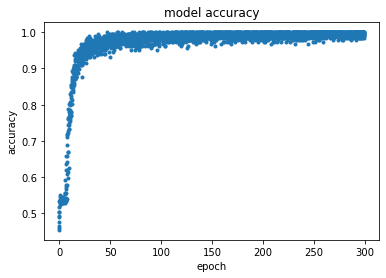

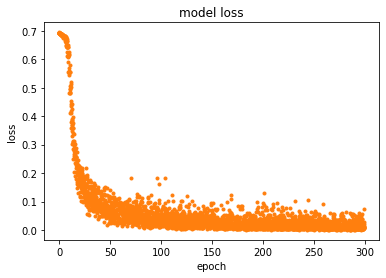

In [14]:
from matplotlib import pyplot as plt

# summarize history for accuracy
for h in history:
    plt.plot(h.history['accuracy'], marker='.', ls=' ', color='tab:blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
for h in history:
    plt.plot(h.history['loss'], marker='.', ls=' ', color='tab:orange')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()